In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
main = pd.read_csv('/content/2021_development.csv')

In [ ]:
main.columns

Index(['HDI rank', 'Country', 'Human Development Index (HDI) - 2021',
       'Life expectancy at birth - 2021', 'Expected years of schooling - 2021',
       'Mean years of schooling - 2021',
       'Gross national income (GNI) per capita - 2021'],
      dtype='object')

In [ ]:
main.rename(columns = {'HDI rank' : 'hdi_rank',
                         'Country' : 'country',
                         'Human Development Index (HDI) - 2021' : 'hdi',
                         'Life expectancy at birth - 2021' : 'life_expectancy',
                         'Expected years of schooling - 2021' : 'expected_years_schooling',
                         'Mean years of schooling - 2021' : 'mean_years_schooling',
                         'Gross national income (GNI) per capita - 2021' : 'gni_per_capita'},
            inplace = True)

In [ ]:
main.head(3)

,hdi_rank,country,hdi,life_expectancy,expected_years_schooling,mean_years_schooling,gni_per_capita
0,1.0,Switzerland,0.962,84.0,16.5,13.9,66933.0
1,2.0,Norway,0.961,83.2,18.2,13.0,64660.0
2,3.0,Iceland,0.959,82.7,19.2,13.8,55782.0


Exploratory Data Analysis:

- I want to know if the expected years of schooling of a country is relevant for a regression model, since the real mean of years in school is what really matters in a population of a country.

In [ ]:
diff = pd.DataFrame(data = main.expected_years_schooling - main.mean_years_schooling, columns = ['difference_mean_expected'])

In [ ]:
main = pd.concat([main,diff], axis = 1)

In [ ]:
main

,hdi_rank,country,hdi,life_expectancy,expected_years_schooling,mean_years_schooling,gni_per_capita,difference_mean_expected
0,1.0,Switzerland,0.962,84.0,16.5,13.9,66933.0,2.6
1,2.0,Norway,0.961,83.2,18.2,13.0,64660.0,5.2
2,3.0,Iceland,0.959,82.7,19.2,13.8,55782.0,5.4
3,4.0,Hong Kong,0.952,85.5,17.3,12.2,62607.0,5.1
4,5.0,Australia,0.951,84.5,21.1,12.7,49238.0,8.4
...,...,...,...,...,...,...,...,...
186,187.0,Burundi,0.426,61.7,10.7,3.1,732.0,7.6
187,188.0,Central African Republic,0.404,53.9,8.0,4.3,966.0,3.7
188,189.0,Niger,0.400,61.6,7.0,2.1,1240.0,4.9
189,190.0,Chad,0.394,52.5,8.0,2.6,1364.0,5.4


In [ ]:
main_numbers = main.drop(columns = ['country'])

<Axes: >

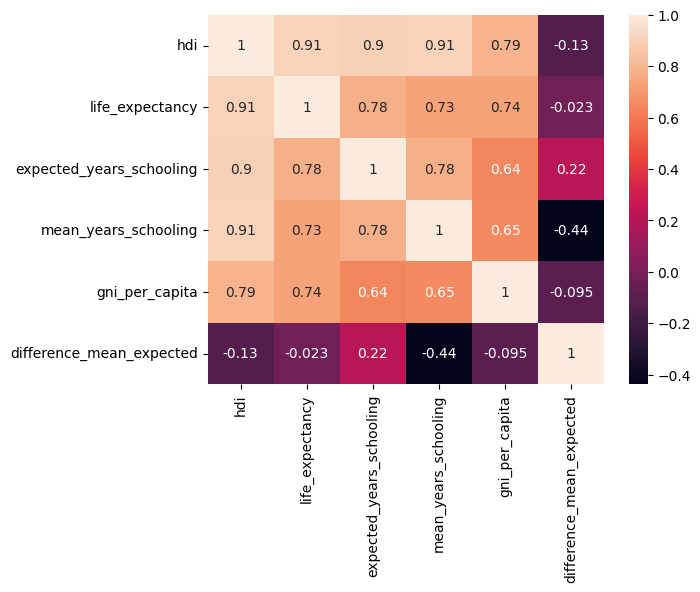

In [ ]:
sns.heatmap(main_numbers.drop(columns = ['hdi_rank']).corr(), annot = True)

The independent variable is the 'HDI', therefore, the mean years is more important than the expected years. Also, the difference of the expected and the mean years cleary has no correlation overall

In [ ]:
main.drop(columns = ['expected_years_schooling', 'difference_mean_expected', 'hdi_rank', 'country'], inplace = True)

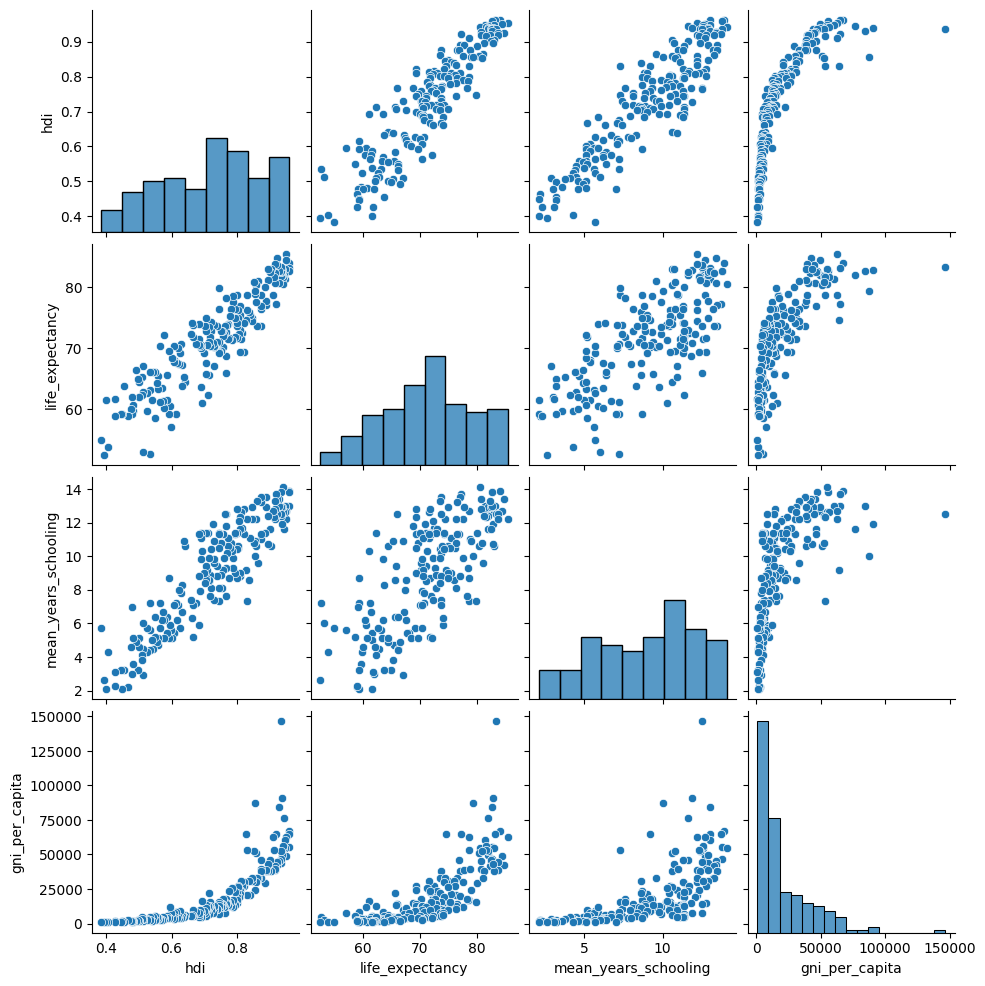

In [ ]:
sns.pairplot(main)

In [ ]:
main

,hdi,life_expectancy,mean_years_schooling,gni_per_capita
0,0.962,84.0,13.9,66933.0
1,0.961,83.2,13.0,64660.0
2,0.959,82.7,13.8,55782.0
3,0.952,85.5,12.2,62607.0
4,0.951,84.5,12.7,49238.0
...,...,...,...,...
186,0.426,61.7,3.1,732.0
187,0.404,53.9,4.3,966.0
188,0.400,61.6,2.1,1240.0
189,0.394,52.5,2.6,1364.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = main.iloc[:, 0:1].values
y

array([[0.962],
       [0.961],
       [0.959],
       [0.952],
       [0.951],
       [0.948],
       [0.947],
       [0.945],
       [0.942],
       [0.941],
       [0.94 ],
       [0.939],
       [0.937],
       [0.937],
       [0.936],
       [0.935],
       [0.93 ],
       [0.929],
       [0.925],
       [0.925],
       [0.921],
       [0.919],
       [0.918],
       [0.918],
       [0.916],
       [0.911],
       [0.905],
       [0.903],
       [0.896],
       [0.895],
       [0.89 ],
       [0.889],
       [0.887],
       [0.876],
       [0.875],
       [0.875],
       [0.875],
       [0.866],
       [0.863],
       [0.858],
       [0.858],
       [0.855],
       [0.855],
       [0.853],
       [0.848],
       [0.846],
       [0.842],
       [0.838],
       [0.832],
       [0.831],
       [0.829],
       [0.822],
       [0.821],
       [0.816],
       [0.812],
       [0.811],
       [0.81 ],
       [0.809],
       [0.809],
       [0.808],
       [0.805],
       [0.803],
       [

In [ ]:
x_life_exp = main.iloc[:, 1:2].values
x_mean_years = main.iloc[:, 2:3].values
x_gni = main.iloc[:, 3:4].values

In [ ]:
model_life_exp = LinearRegression().fit(x_life_exp, y)
model_mean_years_schooling = LinearRegression().fit(x_mean_years, y)
model_gni = LinearRegression().fit(x_gni, y)

In [ ]:
resid_life_exp = model_life_exp.predict(x_life_exp) - y
resid_mean_years = model_mean_years_schooling.predict(x_mean_years) - y
resid_gni = model_gni.predict(x_gni) - y

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
def normal_or_exponential_test(resid, tp):
  stats, p_value = lilliefors(resid, dist = tp)
  if p_value > 0.05:
    return True, p_value, stats
  else:
    return False, p_value, stats

In [ ]:
normal_life_exp, p_le, _ = normal_or_exponential_test(resid_life_exp, tp = 'norm')
normal_life_exp, p_le

(True, 0.9362051580504762)

In [ ]:
normal_mean_years, p_my, _ = normal_or_exponential_test(resid_mean_years, tp = 'norm')
normal_mean_years, p_my

(True, 0.6587399646181327)

In [ ]:
normal_gni, p_gni, _ = normal_or_exponential_test(resid_gni, tp = 'norm')
normal_gni, p_gni

(False, 0.0009999999999998899)

In [ ]:
labels_list = ['Life expectancy', 'Mean years of schooling', 'Gross national income']

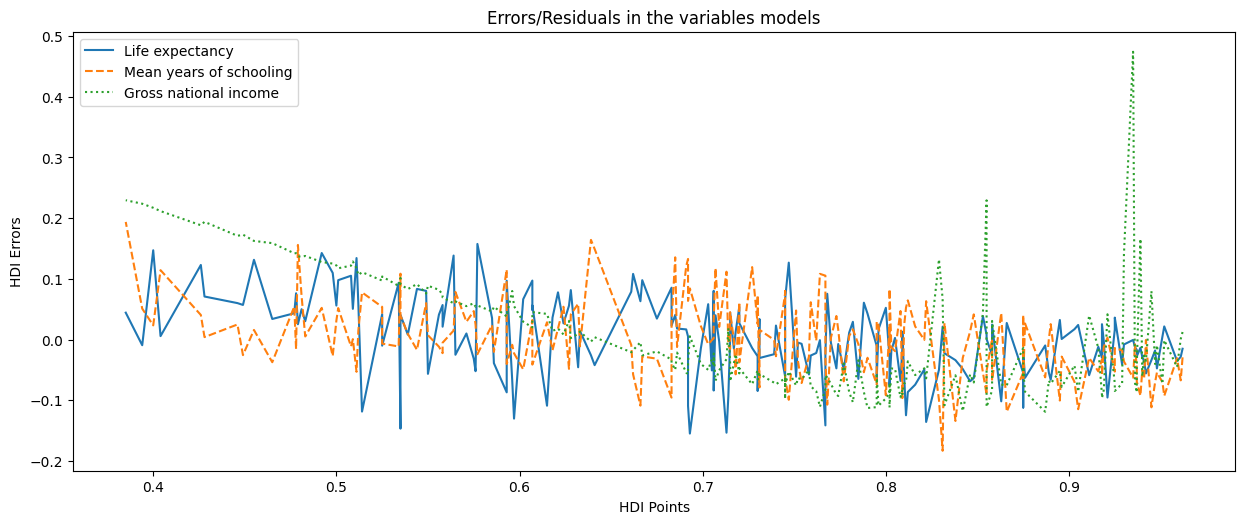

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5.7))


ax.plot(y, resid_life_exp, label = labels_list[0])
ax.plot(y, resid_mean_years, label = labels_list[1], linestyle = '--')
ax.plot(y, resid_gni, label = labels_list[2], linestyle = ':')
ax.legend()
plt.xlabel('HDI Points')
plt.ylabel('HDI Errors')
plt.title('Errors/Residuals in the variables models')
fig.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print(f"Prediction mean errors of the following models:")
print(f'Life experience: {mean_absolute_error(y, model_life_exp.predict(x_life_exp)):.3f}')
print(f'Mean years of scholling: {mean_absolute_error(y, model_mean_years_schooling.predict(x_mean_years)):.3f}')
print(f'Gross national income: {mean_absolute_error(y, model_gni.predict(x_gni)):.3f}')

Prediction mean errors of the following models:
Life experience: 0.051
Mean years of scholling: 0.049
Gross national income: 0.075


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
processing = PolynomialFeatures(degree = 2)

x_gni_poly = processing.fit_transform(x_gni)

In [ ]:
poly_gni = LinearRegression().fit(x_gni_poly, y)

In [ ]:
resid_poly_gni = poly_gni.predict(x_gni_poly) - y

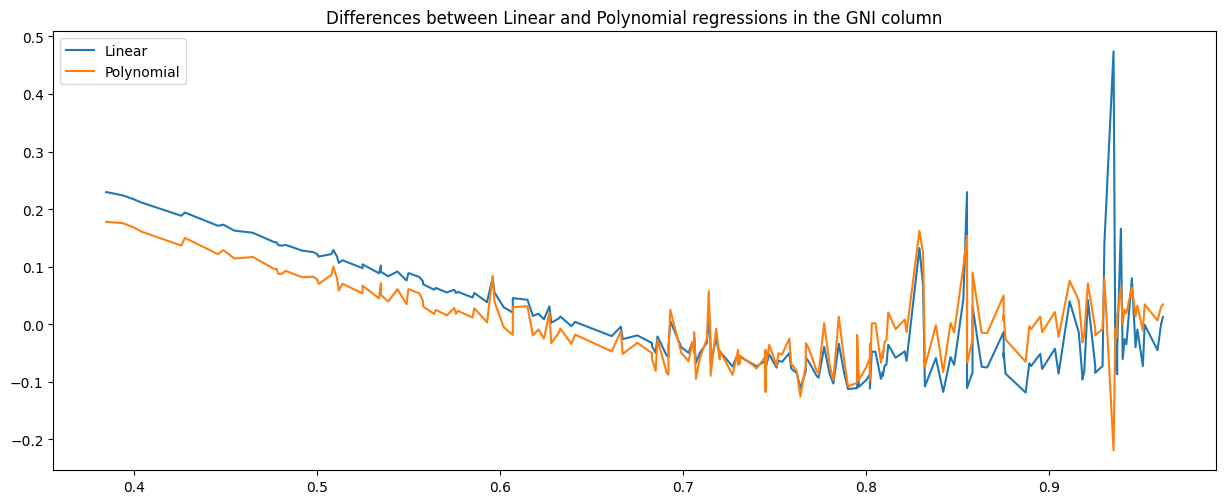

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5.7))

ax.plot(y, resid_gni, label = 'Linear')
ax.plot(y, resid_poly_gni, label = 'Polynomial')
ax.legend()
plt.title('Differences between Linear and Polynomial regressions in the GNI column')
fig.show()

In [ ]:
print('Difference of errors:')
print(f'Linear: {mean_absolute_error(y, model_gni.predict(x_gni)):.3f}')
print(f'Polynomial: {mean_absolute_error(y, poly_gni.predict(x_gni_poly)):.3f}')

Difference of errors:
Linear: 0.075
Polynomial: 0.053


In [ ]:
main_cols = main.columns.tolist()

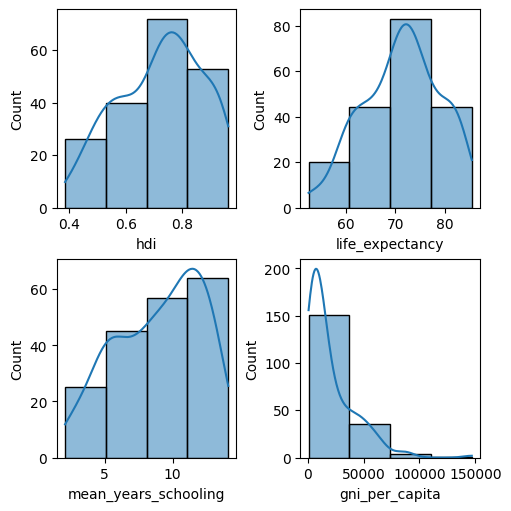

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (5,5), layout = 'constrained')

sns.histplot(data = main, x = main_cols[0], kde = True, ax = axes[0][0], bins = 4)
sns.histplot(data = main, x = main_cols[1], kde = True, ax = axes[0][1], bins = 4)
sns.histplot(data = main, x = main_cols[2], kde = True, ax = axes[1][0], bins = 4)
sns.histplot(data = main, x = main_cols[3], kde = True, ax = axes[1][1], bins = 4)

fig.show()

In [ ]:
log_main = main.copy()

In [ ]:
log_main['hdi_cat'] = 1

In [ ]:
log_main.loc[(log_main.hdi >= 0.800), 'hdi_cat'] = 'very high'
log_main.loc[(log_main.hdi < 0.800) & (log_main.hdi >= 0.700), 'hdi_cat'] = 'high'
log_main.loc[(log_main.hdi < 0.700) & (log_main.hdi >= 0.550), 'hdi_cat'] = 'medium'
log_main.loc[(log_main.hdi < 0.550), 'hdi_cat'] = 'low'

<ipython-input-89-f113e4169c43>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'very high' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  log_main.loc[(log_main.hdi >= 0.800), 'hdi_cat'] = 'very high'


In [ ]:
use_cols = ['life_expectancy', 'mean_years_schooling', 'gni_per_capita']
for cols in range(len(use_cols)):
  print(f"Limits of the {labels_list[cols]} column: ", end = '')
  for i in [0,48,96,144,190]:
    print(f"{sorted(log_main[f'{use_cols[cols]}'].tolist())[i]}", end = ' , ')
  print('')

Limits of the Life expectancy column: 52.5 , 65.8 , 71.8 , 77.0 , 85.5 , 
Limits of the Mean years of schooling column: 2.1 , 6.3 , 9.4 , 11.6 , 14.1 , 
Limits of the Gross national income column: 732.0 , 4620.0 , 12349.0 , 30486.0 , 146830.0 , 


In [ ]:
limits_life_exp = [52.5 , 65.8 , 71.8 , 77.0 , 85.6]
limits_mean_years = [2.1 , 6.3 , 9.4 , 11.6 , 14.2]
limits_gni = [732.0 , 4620.0 , 12349.0 , 30486.0 , 146831.0]

labels = [1,2,3,4]

log_main['gni_per_capita_cat'] = pd.cut(log_main.gni_per_capita, bins = limits_gni, labels = labels, include_lowest = True, right = False)
log_main['mean_years_schooling_cat'] = pd.cut(log_main.mean_years_schooling, bins = limits_mean_years, labels = labels, include_lowest = True, right = False)
log_main['life_expectancy_cat'] = pd.cut(log_main.life_expectancy, bins = limits_life_exp, labels = labels, include_lowest = True, right = False)

In [ ]:
log_main.isnull().sum()

,0
hdi,0
life_expectancy,0
mean_years_schooling,0
gni_per_capita,0
hdi_cat,0
gni_per_capita_cat,0
mean_years_schooling_cat,0
life_expectancy_cat,0


In [ ]:
log_main.drop(columns = ['hdi', 'life_expectancy', 'mean_years_schooling', 'gni_per_capita'], inplace = True)

In [ ]:
for c in log_main.columns:
  log_main[c] = log_main[c].astype('category')
log_main.dtypes

,0
hdi_cat,category
gni_per_capita_cat,category
mean_years_schooling_cat,category
life_expectancy_cat,category


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_features = log_main.iloc[: , 1:4].values
y_features = log_main.iloc[: , 0:1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, random_state = 1, train_size = 0.66)

In [ ]:
log_model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
log_model.predict(X_test)

array(['very high', 'very high', 'medium', 'medium', 'high', 'medium',
       'very high', 'high', 'low', 'high', 'high', 'very high',
       'very high', 'medium', 'low', 'very high', 'medium', 'very high',
       'very high', 'very high', 'high', 'medium', 'medium', 'low',
       'very high', 'very high', 'very high', 'high', 'low', 'very high',
       'very high', 'medium', 'low', 'very high', 'very high', 'high',
       'high', 'very high', 'very high', 'medium', 'very high', 'high',
       'medium', 'high', 'high', 'very high', 'very high', 'very high',
       'medium', 'very high', 'medium', 'low', 'medium', 'high', 'medium',
       'very high', 'medium', 'high', 'very high', 'low', 'medium',
       'very high', 'very high', 'very high', 'high'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, log_model.predict(X_test)))

              precision    recall  f1-score   support

        high       0.79      0.61      0.69        18
         low       0.86      0.55      0.67        11
      medium       0.56      0.82      0.67        11
   very high       0.82      0.92      0.87        25

    accuracy                           0.75        65
   macro avg       0.76      0.72      0.72        65
weighted avg       0.77      0.75      0.75        65

